# **Identity Gate**

This notebook demonstrates the Identity gate quantum operation. \
Author: Michal Forgó \
Time: 22.8.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.


## 1. Explanation & Theory

The Identity Gate is a fundamental quantum gate that performs the simplest operation in quantum computing—it leaves the quantum state unchanged. This document explains the logic, significance, and representation of the Identity Gate, providing a clear understanding of its role in quantum circuits and its implementation from first principles.

### Mathematical Representation

The matrix representation of the Identity gate is:

$$I = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

### Properties

- **Unitary**: $I^\dagger I = I$
- **Hermitian**: $I^\dagger = I$
- **Involutory**: $I^2 = I$
- **Eigenvalues**: Both eigenvalues are 1

### Action on Qubit States

For any qubit state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$:

$$I|\psi\rangle = \alpha|0\rangle + \beta|1\rangle = |\psi\rangle$$

The Identity gate leaves the qubit state completely unchanged, making it useful for:
- Circuit timing and synchronization
- Placeholder operations
- Quantum circuit analysis and debugging


In [14]:
# Import necessary libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit.visualization import plot_state_hinton, plot_state_paulivec
import numpy as np
import matplotlib.pyplot as plt

# Create quantum and classical registers
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')

# Create the quantum circuit
circuit = QuantumCircuit(qreg_q, creg_c)

# Apply Identity gate (which is essentially doing nothing, but we can explicitly add it)
circuit.id(qreg_q[0])  # Identity gate

# Display the circuit
print("Identity Gate Circuit:")
print(circuit.draw())

# Display circuit properties
print(f"\nCircuit depth: {circuit.depth()}")
print(f"Number of qubits: {circuit.num_qubits}")
print(f"Number of operations: {len(circuit.data)}")

Identity Gate Circuit:
     ┌───┐
  q: ┤ I ├
     └───┘
c: 1/═════
          

Circuit depth: 1
Number of qubits: 1
Number of operations: 1


Bloch sphere representation of the quantum state:


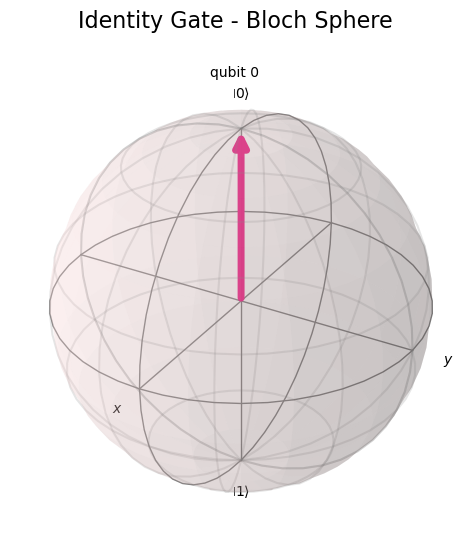

In [15]:
# Bloch sphere representation
print("Bloch sphere representation of the quantum state:")
plot_bloch_multivector(Statevector(circuit), title="Identity Gate - Bloch Sphere")

Circuit with measurement:
     ┌───┐┌─┐
  q: ┤ I ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Measurement results over 1024 shots:
{'0': 1024}


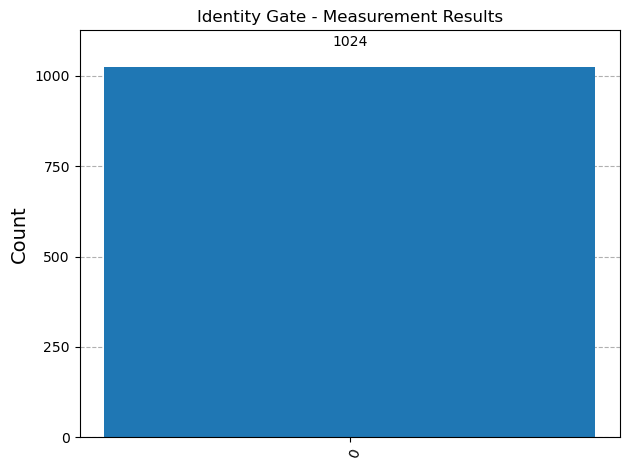

In [16]:
# Measurement and classical bit results
from qiskit_aer import AerSimulator

# Add measurement to the circuit
circuit_with_measurement = circuit.copy()
circuit_with_measurement.measure(qreg_q[0], creg_c[0])

print("Circuit with measurement:")
print(circuit_with_measurement.draw())

# Simulate the circuit
simulator = AerSimulator()
job = simulator.run(circuit_with_measurement, shots=1024)
result = job.result()
counts = result.get_counts()

print(f"\nMeasurement results over 1024 shots:")
print(counts)

# Plot the results
plot_histogram(counts, title="Identity Gate - Measurement Results")

## 3. Summary

In this notebook, we have explored the **Identity Gate**, the most fundamental quantum gate that:

### Key Findings:

1. **Mathematical Properties**:
   - Matrix representation: $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$
   - Unitary, Hermitian, and Involutory
   - Eigenvalues: both equal to 1

2. **Quantum State Behavior**:
   - Leaves any input state completely unchanged
   - Starting from $|0\rangle$, the output remains $|0\rangle$
   - Measurement probabilities: 100% for $|0\rangle$, 0% for $|1\rangle$

3. **Practical Applications**:
   - Circuit timing and synchronization
   - Placeholder operations in quantum algorithms
   - Debugging and analysis tool
   - Baseline reference for other quantum operations

4. **Visualization Insights**:
   - Bloch sphere: State remains at the north pole ($|0\rangle$)
   - All measurement results consistently show the $|0\rangle$ state
   - State representations confirm no change in quantum state

The Identity gate, while seemingly trivial, plays a crucial role in quantum computing as a reference point and timing element in quantum circuits. Understanding its properties provides a solid foundation for comprehending more complex quantum operations.
